In [17]:
import sys
# from sbml import create_model, outputSBML, check
import PyPESTO.FRP.sbml as sbml
# import sbml
from libsbml import *
# import SBMLDiagrams
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initialize Model

In [18]:
document, model = sbml.create_model()
c = sbml.create_compartment(model, 'c')

#### Create Species

In [19]:
I   = sbml.create_species(model, 'I', initialAmount=0.005)
R   = sbml.create_species(model, 'R')

A   = sbml.create_species(model, 'A', initialAmount=1.5)
B   = sbml.create_species(model, 'B', initialAmount=1.5)

RA  = sbml.create_species(model, 'RA')
RB  = sbml.create_species(model, 'RB')

PAA = sbml.create_species(model, 'PAA')
PAB = sbml.create_species(model, 'PAB')
PBA = sbml.create_species(model, 'PBA')
PBB = sbml.create_species(model, 'PBB')

PA  = sbml.create_species(model, 'PA')
PB  = sbml.create_species(model, 'PB')

#### Create Parameters

In [20]:
kd = sbml.create_parameter(model, 'kd', value=1e10)
f  = sbml.create_parameter(model, 'f', constant=True, value=0.5)

kpAA = sbml.create_parameter(model, 'kpAA', value=2)
kpAB = sbml.create_parameter(model, 'kpAB', value=2)
kpBA = sbml.create_parameter(model, 'kpBA', value=2)
kpBB = sbml.create_parameter(model, 'kpBB', value=2)

# kdAA = sbml.create_parameter(model, 'kdAA')
# kdAB = sbml.create_parameter(model, 'kdAB')
# kdBA = sbml.create_parameter(model, 'kdBA')
# kdBB = sbml.create_parameter(model, 'kdBB')

fPAA = sbml.create_parameter(model, 'fPAA', constant=False)
fPAB = sbml.create_parameter(model, 'fPAB', constant=False)
fPBA = sbml.create_parameter(model, 'fPBA', constant=False)
fPBB = sbml.create_parameter(model, 'fPBB', constant=False)

#### Create Rules

In [21]:
PA_rule = sbml.create_rule(model, PA, f'{PAA.id} + {PBA.id} + 1e-10')
PB_rule = sbml.create_rule(model, PB, f'{PAB.id} + {PBB.id} + 1e-10')

fPAA_rule = sbml.create_rule(model, fPAA, f'{PAA.id} / {PA.id}')
fPAB_rule = sbml.create_rule(model, fPAB, f'{PAB.id} / {PB.id}')
fPBA_rule = sbml.create_rule(model, fPBA, f'{PBA.id} / {PA.id}')
fPBB_rule = sbml.create_rule(model, fPBB, f'{PBB.id} / {PB.id}')

#### Create Reactions

In [22]:
# No termination, no depropagation
# from sbml import create_reaction
reactions = [
    ('initiation', {I.id: 1}, {R.id: 2}, f'{kd.id} * {I.id}'),
    ('prop_A', {R.id: 1, A.id: 1}, {RA.id: 1}, f'{kpAA.id} * {R.id} * {A.id}'),
    ('prop_B', {R.id: 1, B.id: 1}, {RB.id: 1}, f'{kpBB.id} * {R.id} * {B.id}'),
    ('prop_RA_A', {RA.id: 1, A.id: 1}, {PAA.id: 1}, f'{kpAA.id} * {RA.id} * {A.id}'),
    ('prop_RA_B', {RA.id: 1, B.id: 1}, {PAB.id: 1}, f'{kpAB.id} * {RA.id} * {B.id}'),
    ('prop_RB_A', {RB.id: 1, A.id: 1}, {PBA.id: 1}, f'{kpBA.id} * {RB.id} * {A.id}'),
    ('prop_RB_B', {RB.id: 1, B.id: 1}, {PBB.id: 1}, f'{kpBB.id} * {RB.id} * {B.id}'),
    ('prop_PAA_A', {PAA.id: 1, A.id: 1}, {PAA.id: 1}, f'{kpAA.id} * {PAA.id} * {A.id}'),
    ('prop_PAA_B', {PAA.id: 1, B.id: 1}, {PAB.id: 1}, f'{kpAB.id} * {PAA.id} * {B.id}'),
    ('prop_PAB_A', {PAB.id: 1, A.id: 1}, {PBA.id: 1}, f'{kpBA.id} * {PAB.id} * {A.id}'),
    ('prop_PAB_B', {PAB.id: 1, B.id: 1}, {PBB.id: 1}, f'{kpBB.id} * {PAB.id} * {B.id}'),
    ('prop_PBA_A', {PBA.id: 1, A.id: 1}, {PAA.id: 1}, f'{kpAA.id} * {PBA.id} * {A.id}'),
    ('prop_PBA_B', {PBA.id: 1, B.id: 1}, {PAB.id: 1}, f'{kpAB.id} * {PBA.id} * {B.id}'),
    ('prop_PBB_A', {PBB.id: 1, A.id: 1}, {PBA.id: 1}, f'{kpBA.id} * {PBB.id} * {A.id}'),
    ('prop_PBB_B', {PBB.id: 1, B.id: 1}, {PBB.id: 1}, f'{kpBB.id} * {PBB.id} * {B.id}'),
    # ('deprop_PAAA', {PAA.id: 1}, {PAA.id: 1, A.id: 1}, f'{kdAA.id} * {fPAA.id} * {PAA.id}'),
    # ('deprop_PBAA', {PAA.id: 1}, {PBA.id: 1, A.id: 1}, f'{kdAA.id} * {fPBA.id} * {PAA.id}'),
    # ('deprop_PABA', {PBA.id: 1}, {PAB.id: 1, A.id: 1}, f'{kdBA.id} * {fPAB.id} * {PBA.id}'),
    # ('deprop_PBBA', {PBA.id: 1}, {PBB.id: 1, A.id: 1}, f'{kdBA.id} * {fPBB.id} * {PBA.id}'),
    # ('deprop_PAAB', {PAB.id: 1}, {PAA.id: 1, B.id: 1}, f'{kdAB.id} * {fPAA.id} * {PAB.id}'),
    # ('deprop_PBAB', {PAB.id: 1}, {PBA.id: 1, B.id: 1}, f'{kdAB.id} * {fPBA.id} * {PAB.id}'),
    # ('deprop_PABB', {PBB.id: 1}, {PAB.id: 1, B.id: 1}, f'{kdBB.id} * {fPAB.id} * {PBB.id}'),
    # ('deprop_PBBB', {PBB.id: 1}, {PBB.id: 1, B.id: 1}, f'{kdBB.id} * {fPBB.id} * {PBB.id}'),
]

# Syntax: (reaction_id, {reactants: stoich}, {products: stoich}, kinetic_law)

# (reaction_id, reactants_dict, products_dict, kinetic_law)

generated_reactions = []
for r in reactions:
    reaction = sbml.create_reaction(model, r[0], r[1], r[2], r[3])
    generated_reactions.append(reaction)

generated_reactions


[<Reaction initiation>,
 <Reaction prop_A>,
 <Reaction prop_B>,
 <Reaction prop_RA_A>,
 <Reaction prop_RA_B>,
 <Reaction prop_RB_A>,
 <Reaction prop_RB_B>,
 <Reaction prop_PAA_A>,
 <Reaction prop_PAA_B>,
 <Reaction prop_PAB_A>,
 <Reaction prop_PAB_B>,
 <Reaction prop_PBA_A>,
 <Reaction prop_PBA_B>,
 <Reaction prop_PBB_A>,
 <Reaction prop_PBB_B>]

#### Output SBML Model to XML file

In [23]:
model_filename = '/SBML/PyPESTO/FRP/sbml_model.xml'
sbml.outputSBML(document, model_filename=model_filename)

#### Visualize SBML Model

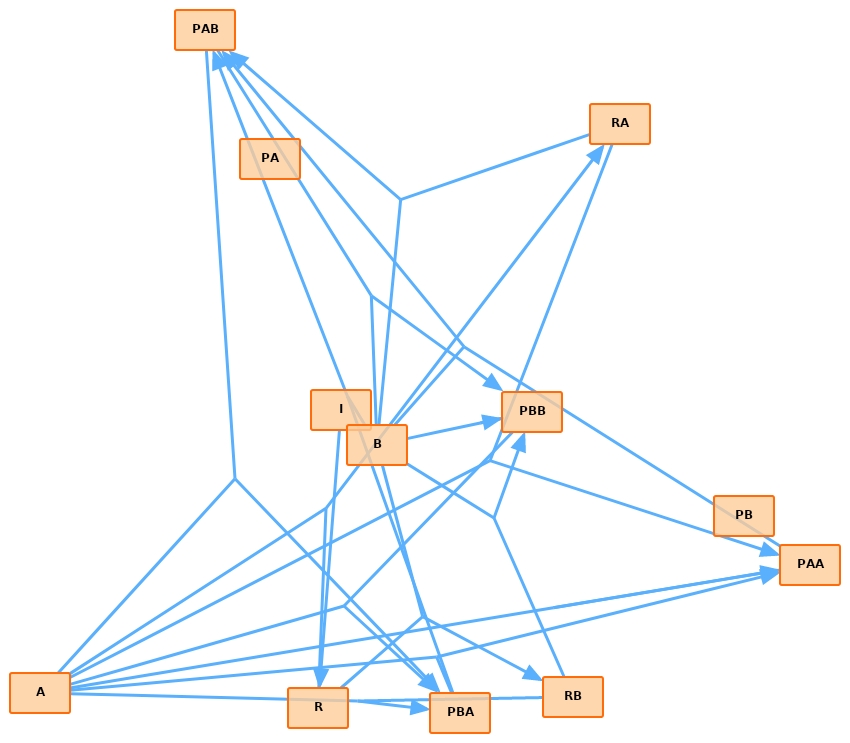

In [24]:
image_filename = 'sbml_model.jpg'
sbml.visualize_model(model_filename, output_filename=image_filename)